In [1]:
import matplotlib.pyplot as plt
import glob
import cv2
import warnings
import os
import cv2
from torchvision import datasets, transforms
warnings.filterwarnings("ignore")

In [3]:
multipleImages = glob.glob(r"E:\FMD_DATASET\showing face\**")
i_ = 0
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

<Figure size 1500x1500 with 0 Axes>

In [4]:
multipleImages = glob.glob(r"E:\FMD_DATASET\covering face\**")
i_ = 0
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

<Figure size 1500x1500 with 0 Axes>

# SPLITING THE DATASET

In [13]:
import os
import shutil
from sklearn.model_selection import train_test_split

def split_dataset(original_dataset_dir, output_base_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    # Ensure the ratios sum to 1.0
    assert train_ratio + val_ratio + test_ratio == 1.0, "Ratios must sum to 1.0"
    
    classes = os.listdir(original_dataset_dir)
    
    for cls in classes:
        cls_dir = os.path.join(original_dataset_dir, cls)
        images = os.listdir(cls_dir)
        
        train_images, test_images = train_test_split(images, test_size=(1 - train_ratio))
        val_images, test_images = train_test_split(test_images, test_size=(test_ratio / (test_ratio + val_ratio)))
        
        _copy_images(cls_dir, train_images, os.path.join(output_base_dir, 'train', cls))
        _copy_images(cls_dir, val_images, os.path.join(output_base_dir, 'val', cls))
        _copy_images(cls_dir, test_images, os.path.join(output_base_dir, 'test', cls))

def _copy_images(src_dir, images, dst_dir):
    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir)
    for img in images:
        src_path = os.path.join(src_dir, img)
        dst_path = os.path.join(dst_dir, img)
        shutil.copy(src_path, dst_path)

original_dataset_dir = r'E:\FMD_DATASET'
output_base_dir = r'E:\FMD_DATASET_SPLIT'
split_dataset(original_dataset_dir, output_base_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15)


# PREPROCESSNG

In [5]:
import os
import cv2
import shutil
import torch
from torchvision import datasets, transforms

# Define the input path
input_path = r'E:\FMD_DATASET_SPLIT\train'
# Define the output path for processed data
output_path = "processed_train"

# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Define the target size for images
target_size = (224, 224)

# Process images and save them to the output directory
for class_name in ['showing_face' , 'covering_face']:
    input_class_path = os.path.join(input_path, class_name)
    output_class_path = os.path.join(output_path, class_name.lower())
    os.makedirs(output_class_path, exist_ok=True)
    for filename in os.listdir(input_class_path):
        image_path = os.path.join(input_class_path, filename)
        output_image_path = os.path.join(output_class_path, filename)
        image = cv2.imread(image_path)
        denoised_image = cv2.GaussianBlur(image, (5, 5), 0)
        resized_denoised_image = cv2.resize(denoised_image, target_size)
        cv2.imwrite(output_image_path, resized_denoised_image)

# Define the path to the processed data directory
data_dir = 'processed_train/'

# Define the transforms for data augmentation and normalization
data_transforms = transforms.Compose([
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset using ImageFolder and apply the defined transforms
train_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)

# Define the batch size for training
batch_size = 32

# Create a DataLoader for the training dataset
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)




In [6]:


# Define the input path
input_path = r'E:\FMD_DATASET_SPLIT\test'
# Define the output path for processed data
output_path = "processed_test"

# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Define the target size for images
target_size = (224, 224)

# Process images and save them to the output directory
for class_name in ['showing_face' , 'covering_face']:
    input_class_path = os.path.join(input_path, class_name)
    output_class_path = os.path.join(output_path, class_name.lower())
    os.makedirs(output_class_path, exist_ok=True)
    for filename in os.listdir(input_class_path):
        image_path = os.path.join(input_class_path, filename)
        output_image_path = os.path.join(output_class_path, filename)
        image = cv2.imread(image_path)
        denoised_image = cv2.GaussianBlur(image, (5, 5), 0)
        resized_denoised_image = cv2.resize(denoised_image, target_size)
        cv2.imwrite(output_image_path, resized_denoised_image)

# Define the path to the processed data directory
data_dir = 'processed_test/'

# Define the transforms for data augmentation and normalization
data_transforms = transforms.Compose([
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset using ImageFolder and apply the defined transforms
test_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)

# Define the batch size for training
batch_size = 32

# Create a DataLoader for the training dataset
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)




In [2]:
data_dir = 'processed_test/'

# Define the transforms for data augmentation and normalization
data_transforms = transforms.Compose([
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset using ImageFolder and apply the defined transforms
test_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)

# Define the batch size for training
batch_size = 32

# Create a DataLoader for the training dataset
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)




In [7]:
import os
import cv2
import shutil
import torch
from torchvision import datasets, transforms

# Define the input path
input_path = r'E:\FMD_DATASET_SPLIT\val'
# Define the output path for processed data
output_path = "processed_val"

# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Define the target size for images
target_size = (224, 224)

# Process images and save them to the output directory
for class_name in ['showing_face' , 'covering_face']:
    input_class_path = os.path.join(input_path, class_name)
    output_class_path = os.path.join(output_path, class_name.lower())
    os.makedirs(output_class_path, exist_ok=True)
    for filename in os.listdir(input_class_path):
        image_path = os.path.join(input_class_path, filename)
        output_image_path = os.path.join(output_class_path, filename)
        image = cv2.imread(image_path)
        denoised_image = cv2.GaussianBlur(image, (5, 5), 0)
        resized_denoised_image = cv2.resize(denoised_image, target_size)
        cv2.imwrite(output_image_path, resized_denoised_image)

# Define the path to the processed data directory
data_dir = 'processed_val/'

# Define the transforms for data augmentation and normalization
data_transforms = transforms.Compose([
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset using ImageFolder and apply the defined transforms
val_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)

# Define the batch size for training
batch_size = 32

# Create a DataLoader for the training dataset
val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)




In [16]:
print("Number of batches in train loader:", len(test_loader))
print("Batch size:", batch_size)
total_images = len(test_loader.dataset)
print("Total number of images:", total_images)


Number of batches in train loader: 57
Batch size: 32
Total number of images: 1810


In [3]:
import torch
import torch.nn as nn
from efficientnet_pytorch import EfficientNet


import torch.optim as optim
import torch.nn as nn

class EfficientNetB0(nn.Module):
    def __init__(self, num_classes=4):
        super(EfficientNetB0, self).__init__()
        self.model = EfficientNet.from_pretrained('efficientnet-b0')
        in_features = self.model._fc.in_features
        self.model._fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.model(x)

model = EfficientNetB0(num_classes=4)  # Change num_classes according to your dataset
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

print(model)


Loaded pretrained weights for efficientnet-b0
EfficientNetB0(
  (model): EfficientNet(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d((0, 1, 0, 1))
    )
    (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
          (static_padding): ZeroPad2d((1, 1, 1, 1))
        )
        (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          32, 8, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          8, 32, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
 

In [6]:
# Calculate total number of parameters in the model
total_params = sum(p.numel() for p in model.parameters())
print(f'Total Model Parameters: {total_params}')


Total Model Parameters: 4012672


In [11]:
# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
eps = 12
# Loop over the dataset for multiple epochs
for epoch in range(20):
    # Set the model to training mode
    model.train()

    # Loop over the training dataset
    for inputs, labels in train_loader:
        # Move inputs and labels to GPU
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()

    # Set the model to evaluation mode
    model.eval()

    # Track the total loss and number of correct predictions for validation
    val_loss = 0.0
    correct = 0
    total = 0

    # Disable gradient calculation during validation
    with torch.no_grad():
        # Loop over the validation dataset
        for inputs, labels in val_loader:
            # Move inputs and labels to GPU
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)

            # Calculate the loss
            val_loss += criterion(outputs, labels).item()

            # Calculate the number of correct predictions
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Print the loss and accuracy for this epoch
    print(f'Epoch [{epoch + 1}/{10}], Loss: {loss.item():.4f}, Val Loss: {val_loss / len(val_loader):.4f}, Val Acc: {(100 * correct / total):.2f}%')

    # Save the model weights
torch.save(model.state_dict(), 'face.pth')



Epoch [1/10], Loss: 0.0611, Val Loss: 0.0956, Val Acc: 96.91%
Epoch [2/10], Loss: 0.0176, Val Loss: 0.0816, Val Acc: 97.13%
Epoch [3/10], Loss: 0.2020, Val Loss: 0.0536, Val Acc: 98.23%
Epoch [4/10], Loss: 0.0268, Val Loss: 0.0506, Val Acc: 98.18%
Epoch [5/10], Loss: 0.1192, Val Loss: 0.0551, Val Acc: 97.96%
Epoch [6/10], Loss: 0.0077, Val Loss: 0.0549, Val Acc: 98.12%
Epoch [7/10], Loss: 0.0148, Val Loss: 0.0502, Val Acc: 98.12%
Epoch [8/10], Loss: 0.2154, Val Loss: 0.0547, Val Acc: 97.96%
Epoch [9/10], Loss: 0.1695, Val Loss: 0.0330, Val Acc: 98.95%
Epoch [10/10], Loss: 0.0457, Val Loss: 0.0542, Val Acc: 97.96%
Epoch [11/10], Loss: 0.0758, Val Loss: 0.0422, Val Acc: 98.34%
Epoch [12/10], Loss: 0.0033, Val Loss: 0.0383, Val Acc: 98.62%
Epoch [13/10], Loss: 0.2620, Val Loss: 0.0407, Val Acc: 98.51%
Epoch [14/10], Loss: 0.0032, Val Loss: 0.0431, Val Acc: 98.18%
Epoch [15/10], Loss: 0.0046, Val Loss: 0.0377, Val Acc: 98.51%
Epoch [16/10], Loss: 0.0196, Val Loss: 0.0415, Val Acc: 98.45%
E

Class-wise Sensitivity: [0.9900744416873449, 0.9717138103161398]
Class-wise Specificity: [0.9717138103161398, 0.9900744416873449]
Class-wise Weighted Error: [0.016022099447513812, 0.016022099447513812]
Class-wise Accuracy: 0.9840
Overall Sensitivity: 0.9809
Overall Specificity: 0.9809
Overall Weighted Error: 0.0160
Overall Accuracy: 0.9840


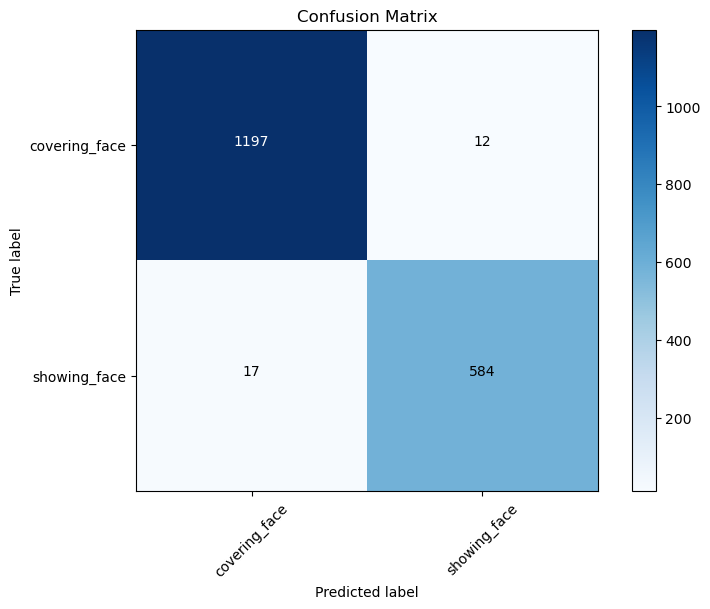

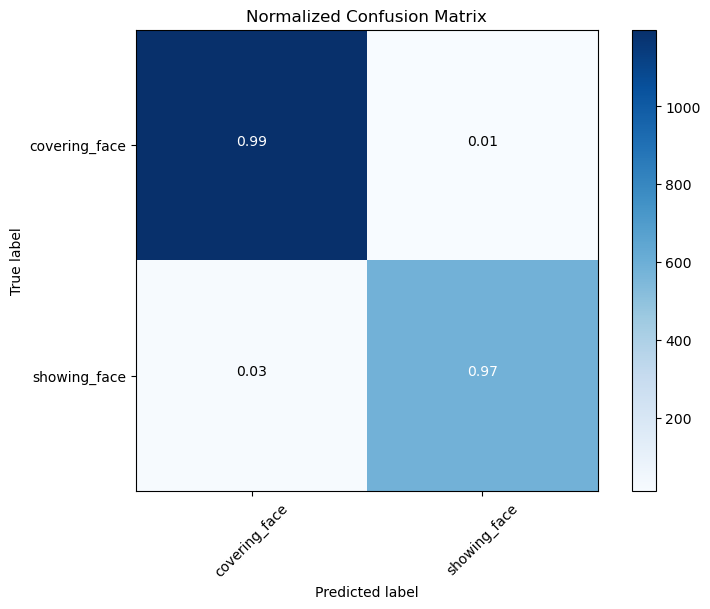

In [7]:
import torch
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = r"E:\face.pth"
model.load_state_dict(torch.load(model_path))
model.to(device)

model.eval()

# Initialize metrics
TP = [0] * 2
TN = [0] * 2 
FP = [0] * 2 
FN = [0] * 2
correct = 0   
total = 0     

all_labels = []
all_preds = []

for inputs, labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)
   
    outputs = model(inputs)
    _, predicted = torch.max(outputs, 1)
    
    all_labels.extend(labels.cpu().numpy())
    all_preds.extend(predicted.cpu().numpy())

    for i in range(2):  # Only for 2 classes
        TP[i] += ((predicted == i) & (labels == i)).sum().item()
        TN[i] += ((predicted != i) & (labels != i)).sum().item()
        FP[i] += ((predicted == i) & (labels != i)).sum().item()
        FN[i] += ((predicted != i) & (labels == i)).sum().item()
    correct += (predicted == labels).sum().item()
    total += labels.size(0)

# Calculate metrics for each class
sensitivity = [TP[i] / (TP[i] + FN[i]) for i in range(2)]
specificity = [TN[i] / (TN[i] + FP[i]) for i in range(2)]
weighted_error = [(FP[i] + FN[i]) / (TP[i] + TN[i] + FP[i] + FN[i]) for i in range(2)]
accuracy = correct / total

# Calculate overall metrics (average of class-wise metrics)
overall_sensitivity = sum(sensitivity) / 2
overall_specificity = sum(specificity) / 2
overall_weighted_error = sum(weighted_error) / 2

print(f'Class-wise Sensitivity: {sensitivity}')
print(f'Class-wise Specificity: {specificity}')
print(f'Class-wise Weighted Error: {weighted_error}')
print(f'Class-wise Accuracy: {accuracy:.4f}')
print(f'Overall Sensitivity: {overall_sensitivity:.4f}')
print(f'Overall Specificity: {overall_specificity:.4f}')
print(f'Overall Weighted Error: {overall_weighted_error:.4f}')
print(f'Overall Accuracy: {accuracy:.4f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]:.2f}" if normalize else cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Define class names (update as per your dataset)
class_names = list(test_loader.dataset.class_to_idx.keys())

# Plot non-normalized confusion matrix
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion Matrix')

# Plot normalized confusion matrix
plot_confusion_matrix(conf_matrix, classes=class_names, normalize=True, title='Normalized Confusion Matrix')

plt.show()


In [4]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = r"C:\Users\Hp\Desktop\face\face.pth"

model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

# Initialize variables to keep track of false negatives and false positives
FN_indices = []  # To store indices of false negatives
FP_indices = []  # To store indices of false positives

# Iterate over the test_loader to make predictions and log errors
for batch_idx, (inputs, labels) in enumerate(test_loader):
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    _, predicted = torch.max(outputs, 1)
    
    # Compare predictions with labels to log FN and FP
    for i in range(labels.size(0)):
        if predicted[i] != labels[i]:
            if predicted[i] == 0:  # False Negative
                FN_indices.append((batch_idx, i))
            elif predicted[i] == 1:  # False Positive
                FP_indices.append((batch_idx, i))

# Print the indices of false negatives and false positives
print(f'False Negative Indices: {FN_indices}')
print(f'False Positive Indices: {FP_indices}')


KeyboardInterrupt: 

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load your trained model
model_path = r"/face.pth"
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

# Initialize variables to keep track of false negatives and false positives
FN_indices = []  # To store indices of false negatives
FP_indices = []  # To store indices of false positives

# Function to denormalize and convert tensor to image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 3)))
    plt.show()

# Iterate over the test_loader to make predictions and log errors
for batch_idx, (inputs, labels) in enumerate(test_loader):
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    _, predicted = torch.max(outputs, 1)

    # Compare predictions with labels to log FN and FP
    for i in range(labels.size(0)):
        if predicted[i] != labels[i]:
            if predicted[i] == 0:  # False Negative
                FN_indices.append((batch_idx, i))
            elif predicted[i] == 1:  # False Positive
                FP_indices.append((batch_idx, i))

# Print the indices and images of false negatives and false positives
print(f'False Negative Indices: {FN_indices}')
print(f'False Positive Indices: {FP_indices}')

# Function to display images based on indices
def display_images(indices, title):
    for batch_idx, img_idx in indices:
        # Get the corresponding image and label
        inputs, labels = next(iter(test_loader))
        image = inputs[img_idx]

        # Convert tensor to image and display
        image = image.cpu().numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

        plt.imshow(image)
        plt.title(f'{title} - Batch: {batch_idx}, Image: {img_idx}')
        plt.axis('off')
        plt.show()

# Display false negatives and false positives
print("False Negatives:")
display_images(FN_indices, "False Negative")

print("False Positives:")
display_images(FP_indices, "False Positive")


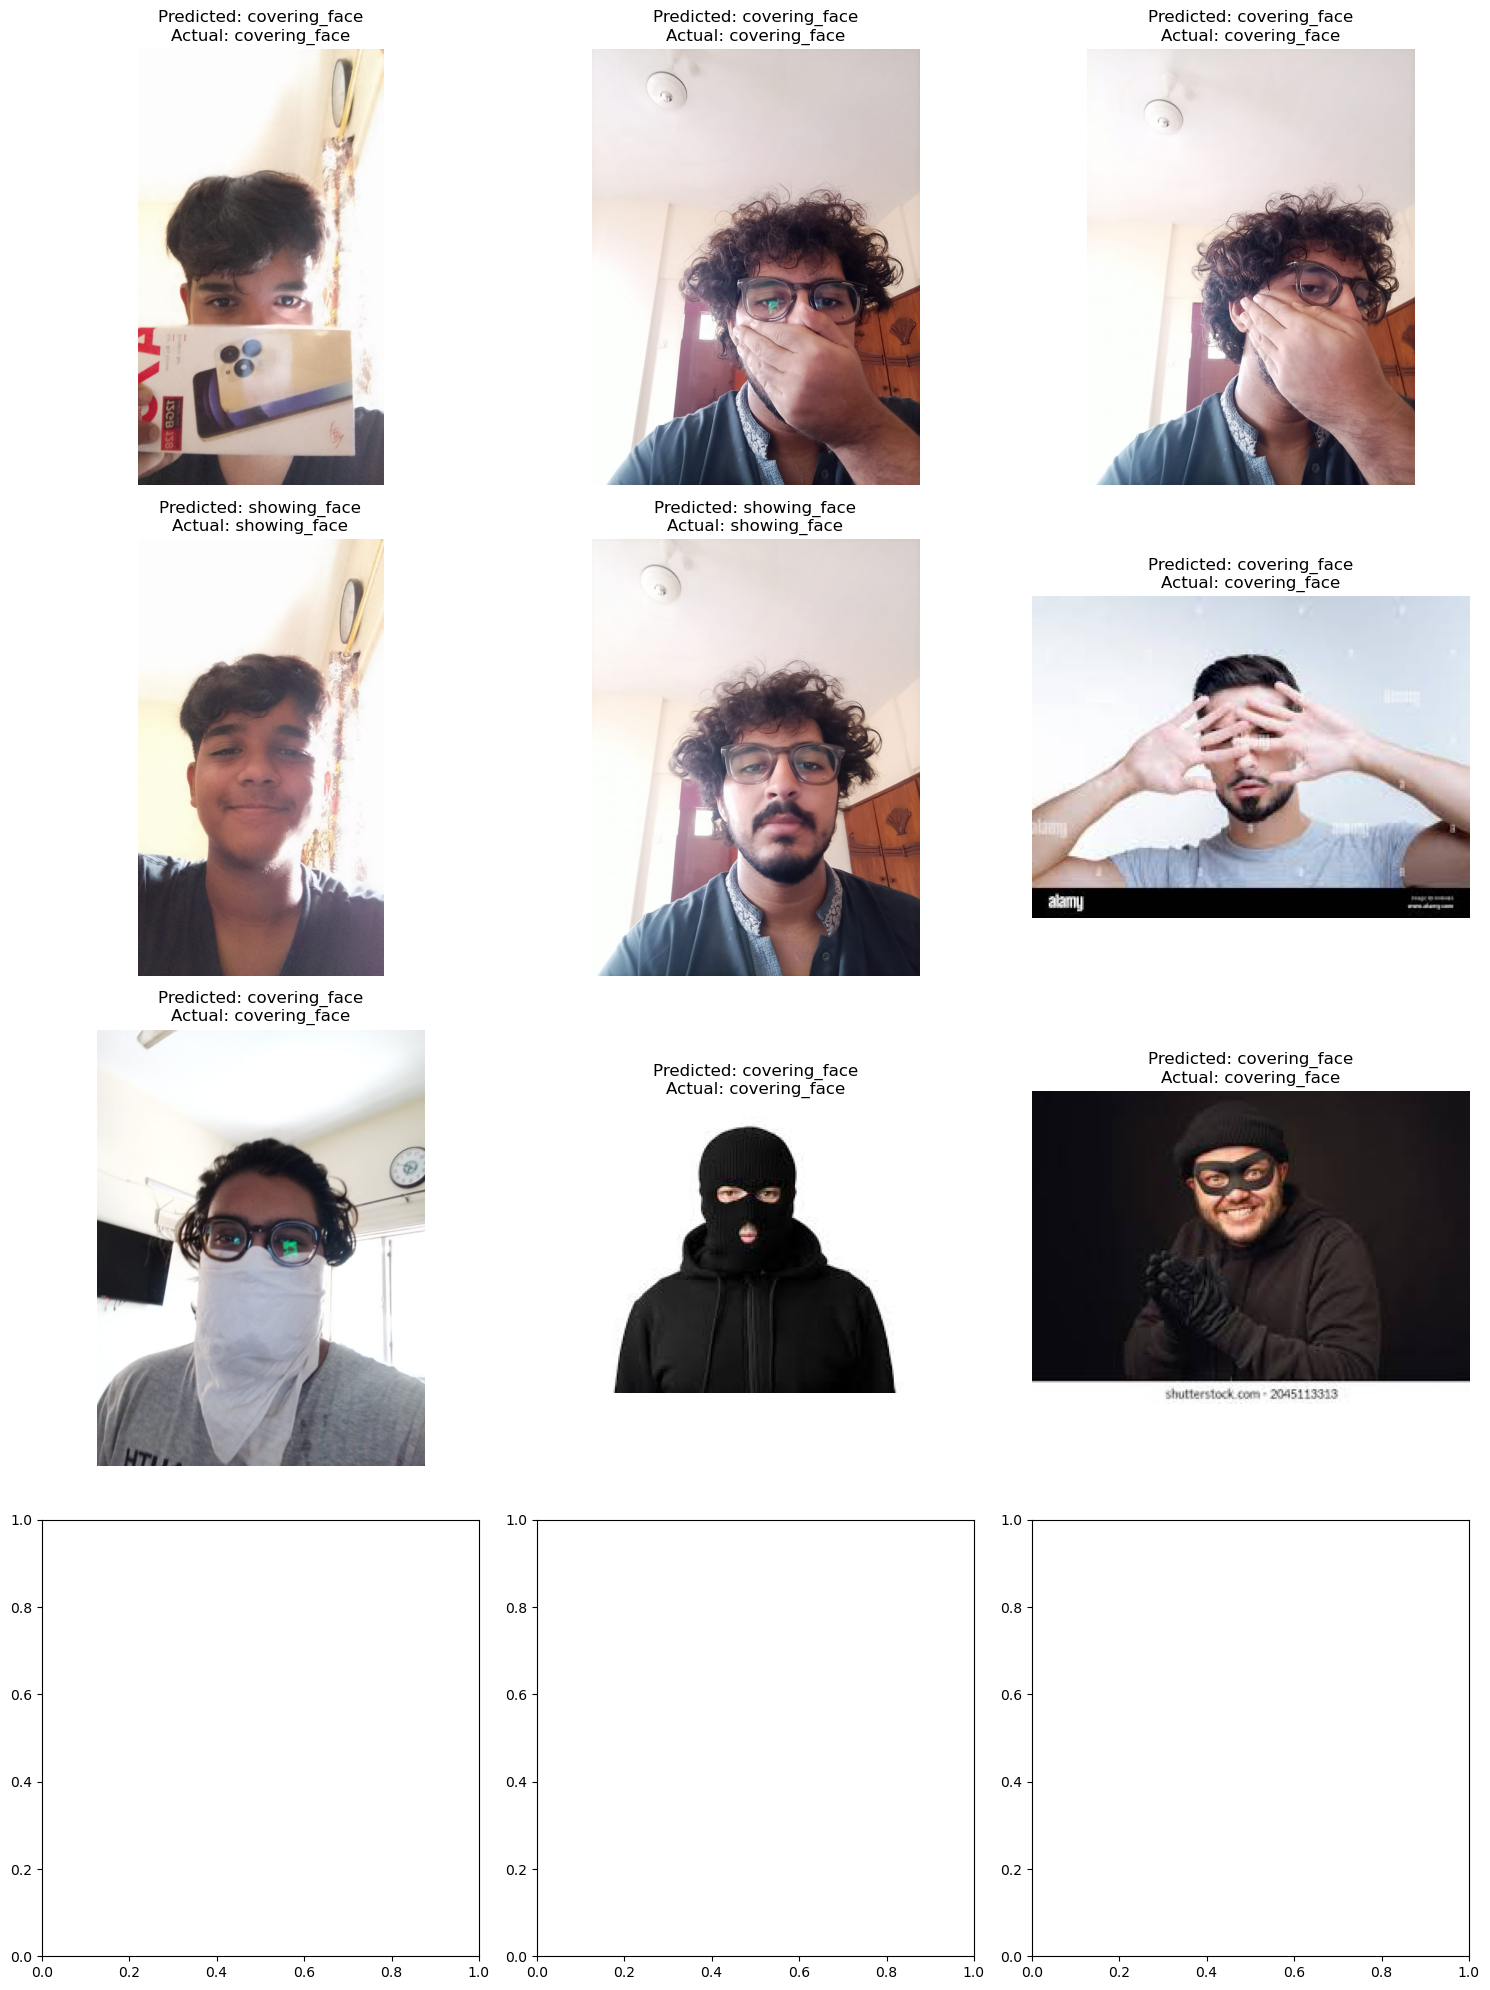

In [18]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = r"E:\face.pth"
model.load_state_dict(torch.load(model_path))
model.to(device)


# Define transformations to be applied to the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the same size used during training
    transforms.ToTensor(),           # Convert PIL image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet mean and standard deviation
])

def predict_image(image_path, actual_class, ax):
    # Load the image from the provided path
    image = Image.open(image_path).convert("RGB")  # Ensure image is RGB

    # Apply transformations to the image
    input_image = transform(image).unsqueeze(0)  # Add batch dimension

    # Move the input image to the appropriate device (CPU or GPU)
    input_image = input_image.to(device)

    # Set the model to evaluation mode
    model.eval()

    # Forward pass through the model
    with torch.no_grad():
        outputs = model(input_image)

    # Get the predicted class index
    _, predicted = torch.max(outputs, 1)

    # Map predicted index to class label
    class_index = predicted.item()

    # Convert class index to actual class name using test_loader
    for class_name, idx in test_loader.dataset.class_to_idx.items():
        if idx == class_index:
            predicted_class_name = class_name
            break

    if predicted_class_name is not None:
        # Print predicted and actual class
        ax.set_title(f'Predicted: {predicted_class_name}\nActual: {actual_class}')
        
        # Plot the image
        ax.imshow(image)
        ax.axis('off')
    else:
        print("Failed to find the predicted class name.")

# List of image paths
image_paths = [r"C:\Users\Shaikh Abdul Rafay\Downloads\h1.jpg",
               r"C:\Users\Shaikh Abdul Rafay\Downloads\h3.jpg",
               r"C:\Users\Shaikh Abdul Rafay\Downloads\h4.jpg",
               r"C:\Users\Shaikh Abdul Rafay\Downloads\s1.jpg",
               r"C:\Users\Shaikh Abdul Rafay\Downloads\s2.jpg",
               r"C:\Users\Shaikh Abdul Rafay\Downloads\download (3).jpeg",
               r"C:\Users\Shaikh Abdul Rafay\Downloads\h5.jpg",
               r"C:\Users\Shaikh Abdul Rafay\Downloads\download (2).jpeg",
               r"C:\Users\Shaikh Abdul Rafay\Downloads\download (1).jpeg",
               r"C:\Users\Shaikh Abdul Rafay\Downloads\download.jpeg",
               
               ]



actual_classes = ['covering_face' ,'covering_face','covering_face','showing_face' ,'showing_face' ,'covering_face','covering_face','covering_face','covering_face']
# Create subplots
num_images = len(image_paths)
rows = (num_images // 3) + (1 if num_images % 3 != 0 else 0)
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))

# Predict and plot information for each image
for i, (image_path, actual_class) in enumerate(zip(image_paths, actual_classes)):
    row = i // 3
    col = i % 3
    ax = axes[row, col] if rows > 1 else axes[col]
    predict_image(image_path, actual_class, ax)

# Adjust layout
plt.tight_layout()
plt.show()


In [4]:
import torch
from torchvision import transforms
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = r"C:\Users\Hp\Desktop\face\face.pth"

model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)


# Define transformations to be applied to the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the same size used during training
    transforms.ToTensor(),           # Convert PIL image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet mean and standard deviation
])

# Load the image from the provided path
image_path = r"C:\Users\Hp\Downloads\WhatsApp Image 2024-07-02 at 17.07.37_6445acb1.jpg" # Replace with the actual path to your image
image = Image.open(image_path).convert("RGB")  # Ensure image is RGB

# Apply transformations to the image
input_image = transform(image).unsqueeze(0)  # Add batch dimension

# Move the input image to the appropriate device (CPU or GPU)
input_image = input_image.to(device)

# Set the model to evaluation mode
model.eval()

# Forward pass through the model
with torch.no_grad():
    outputs = model(input_image)

# Get the predicted class index
_, predicted = torch.max(outputs, 1)

# Map predicted index to class labela
class_index = predicted.item()

# Convert class index to actual class name using test_loader
predicted_class_name = None
for class_name, idx in test_loader.dataset.class_to_idx.items():
    if idx == class_index:
        predicted_class_name = class_name
        break

if predicted_class_name is not None:
    print(f'Predicted Class Index: {class_index}')
    print(f'Predicted Class Name: {predicted_class_name}')
else:
    print("Failed to find the predicted class name.")


Predicted Class Index: 0
Predicted Class Name: covering_face


In [6]:
import torch
import torchvision.transforms as transforms
import cv2
import numpy as np
from PIL import Image

# Load your trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = r"C:\Users\Hp\Desktop\face\face.pth"
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

# Define the transformations to be applied to the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the same size used during training
    transforms.ToTensor(),          # Convert PIL image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet mean and std
])

# Extract class names from test loader
class_names = {v: k for k, v in test_loader.dataset.class_to_idx.items()}

# Define the function to make predictions
def predict_frame(frame):
    # Convert the frame to PIL image
    image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    # Apply transformations to the image
    input_image = transform(image).unsqueeze(0)  # Add batch dimension

    # Move the input image to the appropriate device (CPU or GPU)
    input_image = input_image.to(device)

    # Forward pass through the model
    with torch.no_grad():
        outputs = model(input_image)
    
    # Get the predicted class index
    _, predicted = torch.max(outputs, 1)
    return predicted.item()

# Capture video from the webcam
cap = cv2.VideoCapture(0)

while True:
    # Read frame from the webcam
    ret, frame = cap.read()
    if not ret:
        break

    # Make prediction on the current frame
    class_idx = predict_frame(frame)
    predicted_class_name = class_names[class_idx]

    # Display the predicted class on the frame
    cv2.putText(frame, f'Prediction: {predicted_class_name}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Show the frame with prediction
    cv2.imshow('Webcam', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 